<a href="https://colab.research.google.com/github/theertharajeevan/theertha_portifolio/blob/main/Land_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/House Price India.csv.zip')
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
df.isna().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [ ]:
df.shape

(14620, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [ ]:
df.nunique()

id                                       14620
Date                                       241
number of bedrooms                          12
number of bathrooms                         29
living area                                865
lot area                                  7451
number of floors                             6
waterfront present                           2
number of views                              5
condition of the house                       5
grade of the house                          10
Area of the house(excluding basement)      781
Area of the basement                       280
Built Year                                 116
Renovation Year                             68
Postal Code                                 70
Lattitude                                 4662
Longitude                                  716
living_area_renov                          665
lot_area_renov                            6835
Number of schools nearby                     3
Distance from

In [ ]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,67.347991,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
df.drop(['id', 'Date'], axis=1, inplace=True)

In [ ]:
df

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,2,1.50,1556,20000,1.0,0,0,4,7,1556,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,3,2.00,1680,7000,1.5,0,0,4,7,1680,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,2,1.00,1070,6120,1.0,0,0,3,6,1070,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,4,1.00,1030,6621,1.0,0,0,4,6,1030,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df.dtypes

number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools nearby                   int64
Distance from the airport                  int64
Price               

In [ ]:
x=df.iloc[:,:-1].values
x

array([[5.000e+00, 2.500e+00, 3.650e+03, ..., 5.400e+03, 2.000e+00,
        5.800e+01],
       [4.000e+00, 2.500e+00, 2.920e+03, ..., 4.000e+03, 2.000e+00,
        5.100e+01],
       [5.000e+00, 2.750e+00, 2.910e+03, ..., 6.600e+03, 1.000e+00,
        5.300e+01],
       ...,
       [2.000e+00, 1.000e+00, 1.070e+03, ..., 6.120e+03, 2.000e+00,
        6.400e+01],
       [4.000e+00, 1.000e+00, 1.030e+03, ..., 6.631e+03, 3.000e+00,
        5.400e+01],
       [3.000e+00, 1.000e+00, 9.000e+02, ..., 3.480e+03, 2.000e+00,
        5.500e+01]])

In [ ]:
y=df.iloc[:,-1].values
y

array([2380000, 1400000, 1200000, ...,  209000,  205000,  146000])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_train

array([[4.000e+00, 2.500e+00, 1.840e+03, ..., 1.504e+04, 1.000e+00,
        7.000e+01],
       [4.000e+00, 1.750e+00, 1.430e+03, ..., 8.640e+03, 3.000e+00,
        7.800e+01],
       [3.000e+00, 2.500e+00, 2.070e+03, ..., 5.013e+03, 1.000e+00,
        6.300e+01],
       ...,
       [5.000e+00, 3.250e+00, 4.240e+03, ..., 8.425e+03, 1.000e+00,
        5.500e+01],
       [2.000e+00, 1.000e+00, 1.070e+03, ..., 8.775e+03, 3.000e+00,
        7.000e+01],
       [3.000e+00, 1.750e+00, 1.590e+03, ..., 7.931e+03, 1.000e+00,
        8.000e+01]])

In [ ]:
y_train

array([ 390000,  412000,  289950, ..., 1050000,  327000,  240000])

In [ ]:
x_test

array([[3.0000e+00, 1.7500e+00, 1.6600e+03, ..., 1.0000e+04, 2.0000e+00,
        5.3000e+01],
       [3.0000e+00, 2.2500e+00, 1.6300e+03, ..., 3.3480e+03, 2.0000e+00,
        5.7000e+01],
       [3.0000e+00, 4.0000e+00, 1.3900e+03, ..., 1.8550e+03, 3.0000e+00,
        7.7000e+01],
       ...,
       [4.0000e+00, 3.5000e+00, 3.2000e+03, ..., 8.5060e+03, 2.0000e+00,
        7.9000e+01],
       [3.0000e+00, 1.7500e+00, 1.7200e+03, ..., 1.3588e+04, 2.0000e+00,
        5.6000e+01],
       [3.0000e+00, 1.5000e+00, 1.2800e+03, ..., 1.4220e+03, 3.0000e+00,
        6.4000e+01]])

In [ ]:
y_test

array([331292, 497000, 458000, ..., 935100, 430000, 281000])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_test

array([[-0.40708138, -0.47553692, -0.46547877, ..., -0.10469101,
        -0.01379057, -1.32888277],
       [-0.40708138,  0.16112515, -0.49695323, ..., -0.36059651,
        -0.01379057, -0.88234151],
       [-0.40708138,  2.38944238, -0.74874892, ..., -0.41803291,
         1.22060619,  1.35036481],
       ...,
       [ 0.69915092,  1.75278031,  1.15021024, ..., -0.16216588,
        -0.01379057,  1.57363544],
       [-0.40708138, -0.47553692, -0.40252985, ...,  0.033341  ,
        -0.01379057, -0.99397682],
       [-0.40708138, -0.79386795, -0.86415528, ..., -0.43469062,
         1.22060619, -0.1008943 ]])

In [ ]:
k_model=KNeighborsRegressor(n_neighbors=7)
lr_model=LinearRegression()
dt_model = DecisionTreeRegressor()
sv_model=SVR()
lsb_model=[k_model,lr_model,dt_model,sv_model]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
all_predictions = []

In [ ]:
for i in lsb_model:
    print(i)
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    print('************************************************************************************')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'R-squared Score: {r2_score(y_test, y_pred)}')
    print('*************************************************************************************')

KNeighborsRegressor(n_neighbors=7)
************************************************************************************
Mean Squared Error: 35560839005.5838
R-squared Score: 0.7608868077342585
*************************************************************************************
LinearRegression()
************************************************************************************
Mean Squared Error: 45051438839.98544
R-squared Score: 0.6970714511122125
*************************************************************************************
DecisionTreeRegressor()
************************************************************************************
Mean Squared Error: 34018078475.752167
R-squared Score: 0.7712604211108075
*************************************************************************************
SVR()
************************************************************************************
Mean Squared Error: 157163507501.57706
R-squared Score: -0.05677675322795572
*******************

<ipython-input-50-4b584a419c21>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["number of bedrooms"], color="pink")
<ipython-input-50-4b584a419c21>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["number of bathrooms"], color="b")


Text(0.5, 0.98, 'Distribution of Bedrooms and Bathrooms')

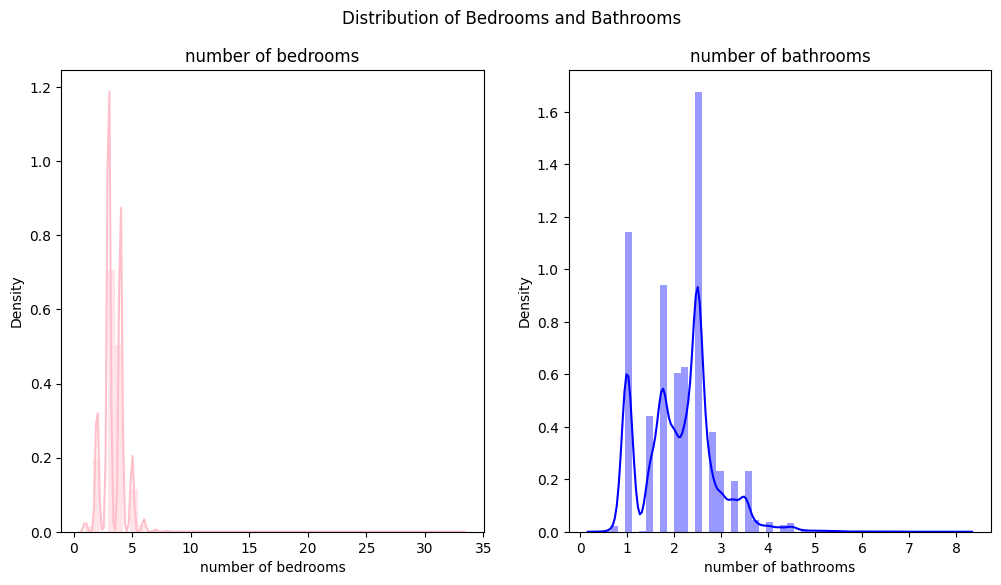

In [ ]:
f = plt.figure(figsize=(12, 6))
ax=f.add_subplot(121)
sns.distplot(df["number of bedrooms"], color="pink")
plt.title("number of bedrooms")

ax=f.add_subplot(122)
sns.distplot(df["number of bathrooms"], color="b")
plt.title("number of bathrooms")
plt.suptitle("Distribution of Bedrooms and Bathrooms")

Text(0.5, 1.0, 'Distribution of Prices by nearby Schools')

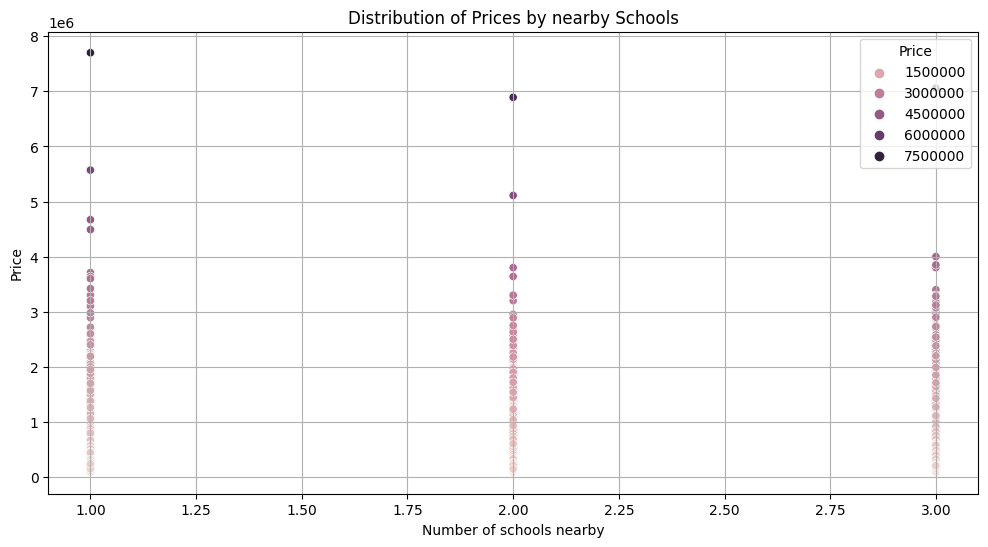

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Number of schools nearby", y="Price", hue="Price")
plt.grid()
plt.title("Distribution of Prices by nearby Schools")

Text(0.5, 1.0, 'Distribution of Prices by Distance from the Airport')

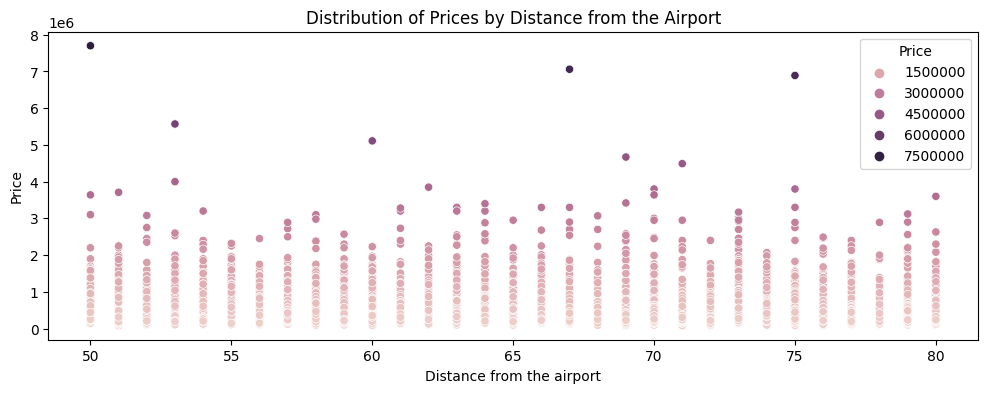

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=df, x="Distance from the airport", y="Price", hue="Price")
plt.title("Distribution of Prices by Distance from the Airport")

Text(0.5, 1.0, 'Distribution of Prices by Number of Bedrooms')

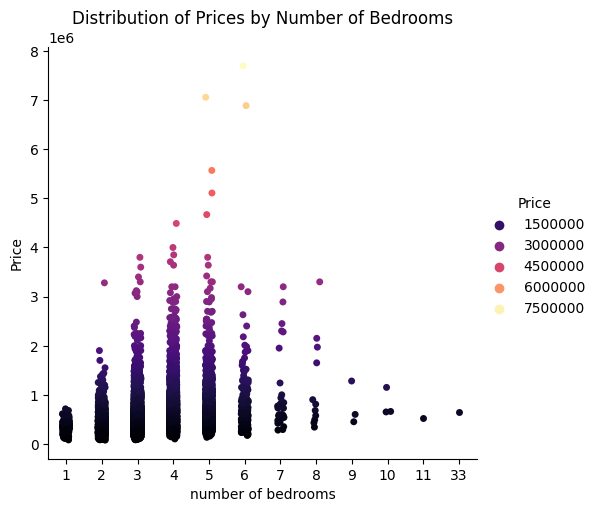

In [ ]:
sns.catplot(data=df, x="number of bedrooms", y="Price", palette="magma", hue="Price")
plt.title("Distribution of Prices by Number of Bedrooms")

Text(0.5, 1.0, 'Distribution of Prices with Built Year')

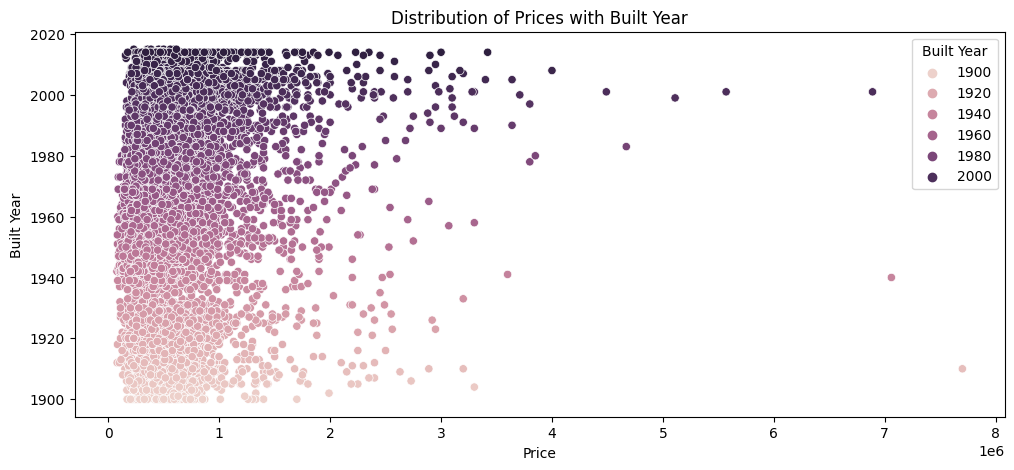

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(y="Built Year", x="Price", data=df, hue="Built Year")
plt.title("Distribution of Prices with Built Year")

<Axes: xlabel='number of bathrooms', ylabel='Count'>

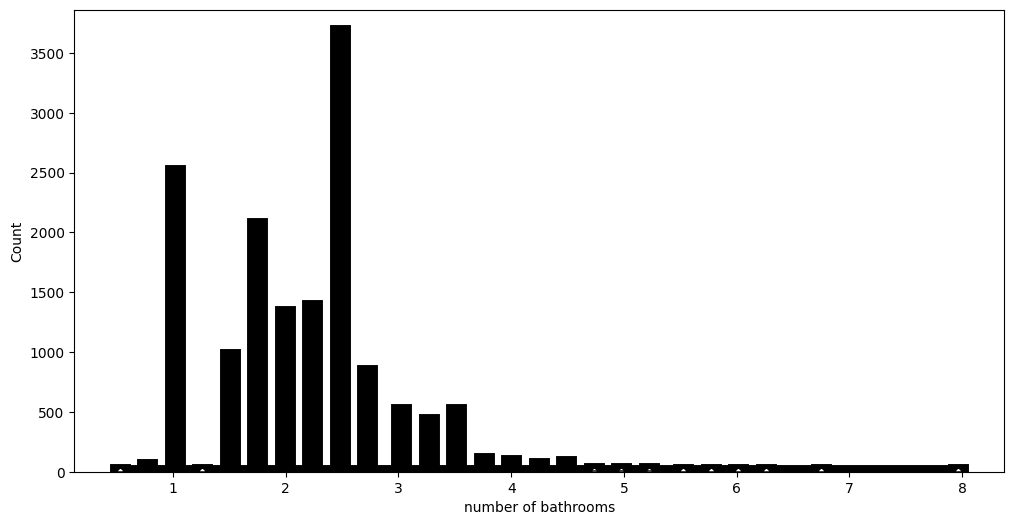

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["number of bathrooms"], color="black", linewidth=10)

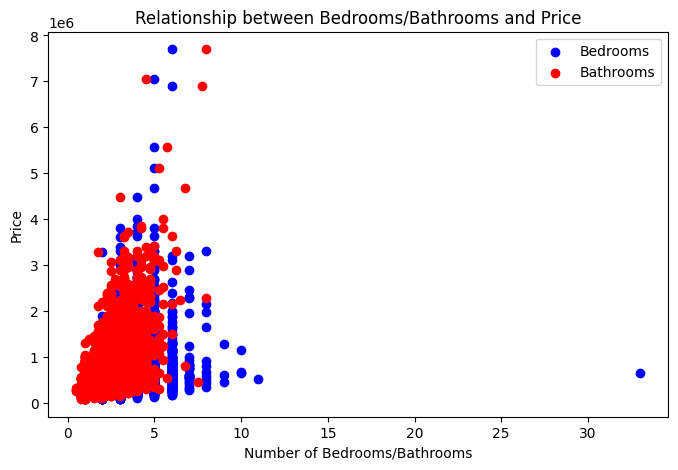

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['number of bedrooms'], df['Price'], color='b', label='Bedrooms')
ax.scatter(df['number of bathrooms'], df['Price'], color='r', label='Bathrooms')
ax.set_xlabel('Number of Bedrooms/Bathrooms')
ax.set_ylabel('Price')
ax.set_title('Relationship between Bedrooms/Bathrooms and Price')
ax.legend()
plt.show()

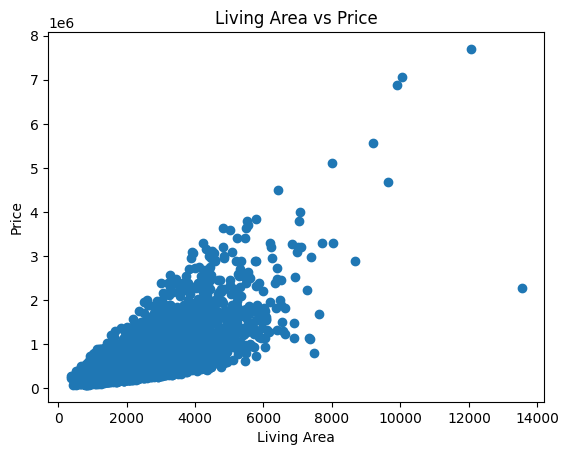

In [ ]:
plt.scatter(df['living area'], df['Price'])
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.title('Living Area vs Price')
plt.show()

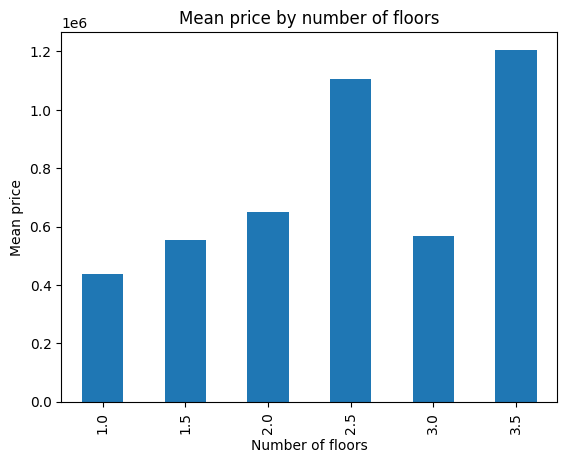

In [ ]:
mean_price_by_floors = df.groupby('number of floors')['Price'].mean()
mean_price_by_floors.plot(kind='bar')
plt.xlabel('Number of floors')
plt.ylabel('Mean price')
plt.title('Mean price by number of floors')
plt.show()

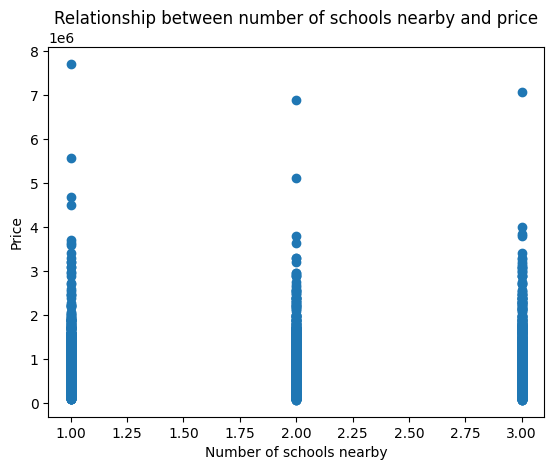

In [ ]:
plt.scatter(df['Number of schools nearby'], df['Price'])
plt.xlabel('Number of schools nearby')
plt.ylabel('Price')
plt.title('Relationship between number of schools nearby and price')
plt.show()

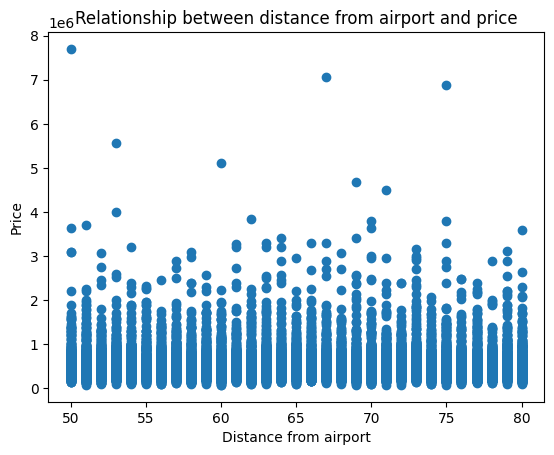

In [ ]:
plt.scatter(df['Distance from the airport'], df['Price'])
plt.xlabel('Distance from airport')
plt.ylabel('Price')
plt.title('Relationship between distance from airport and price')
plt.show()

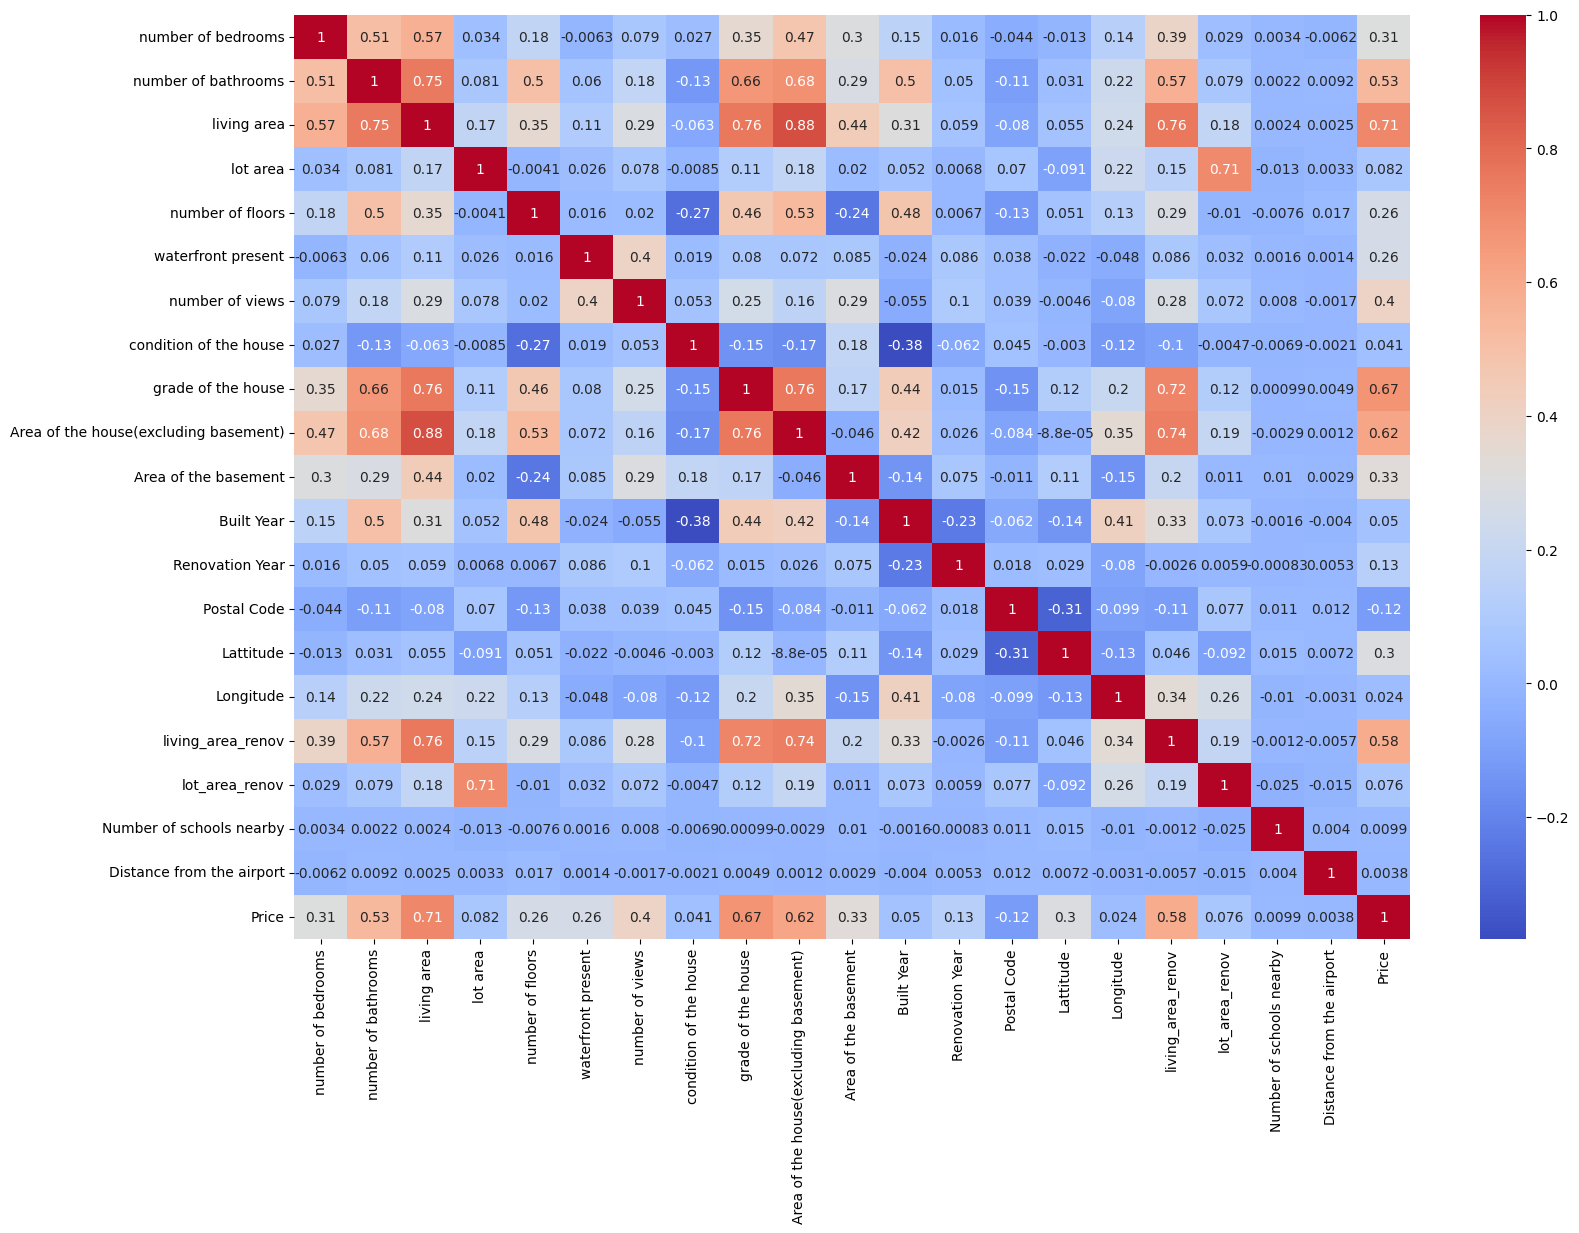

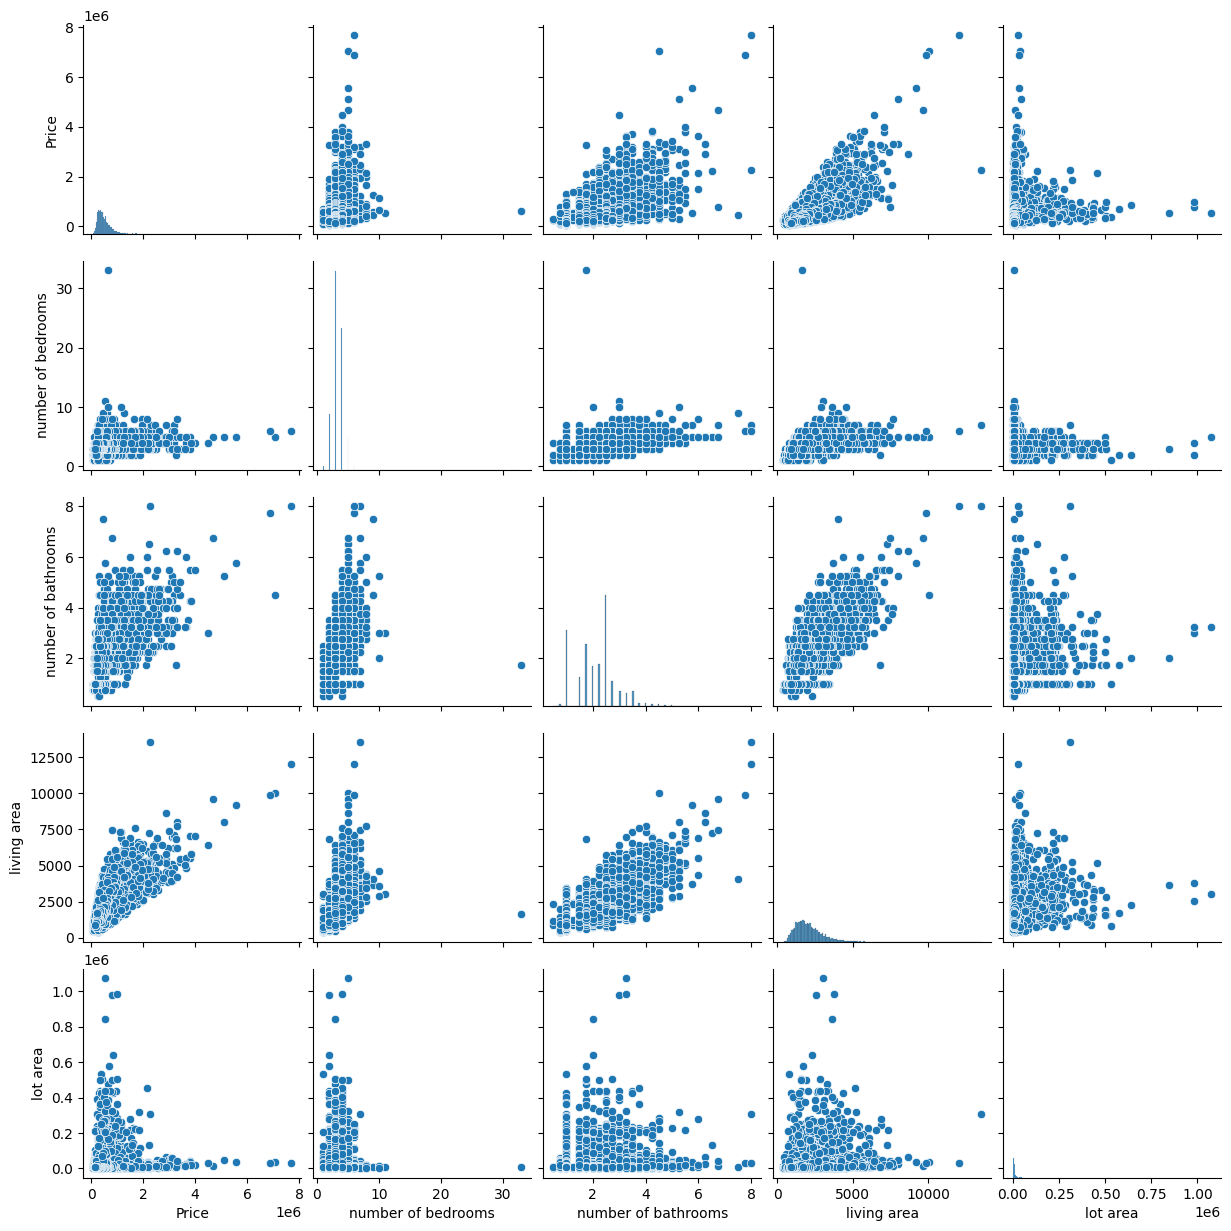

In [ ]:
#Correlation heatmap#
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Pairplot for selected features
selected_features = ["Price", "number of bedrooms", "number of bathrooms", "living area", "lot area"]
sns.pairplot(df[selected_features])
plt.show()

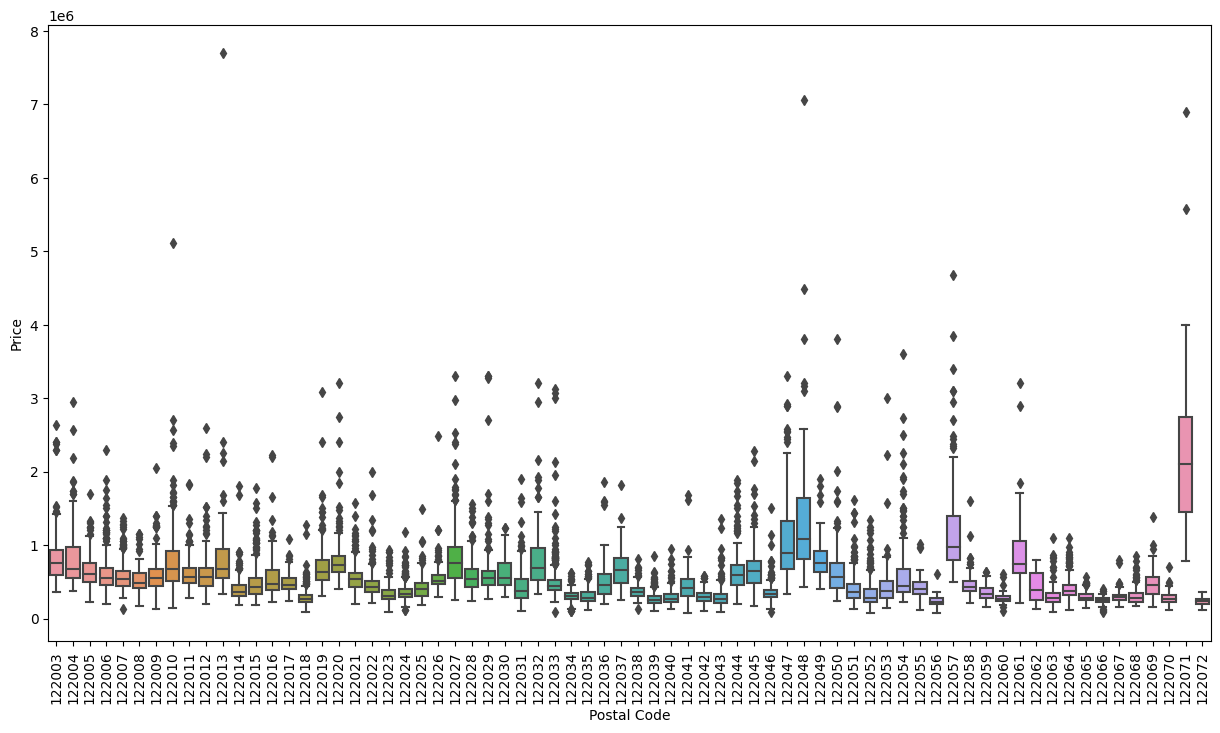

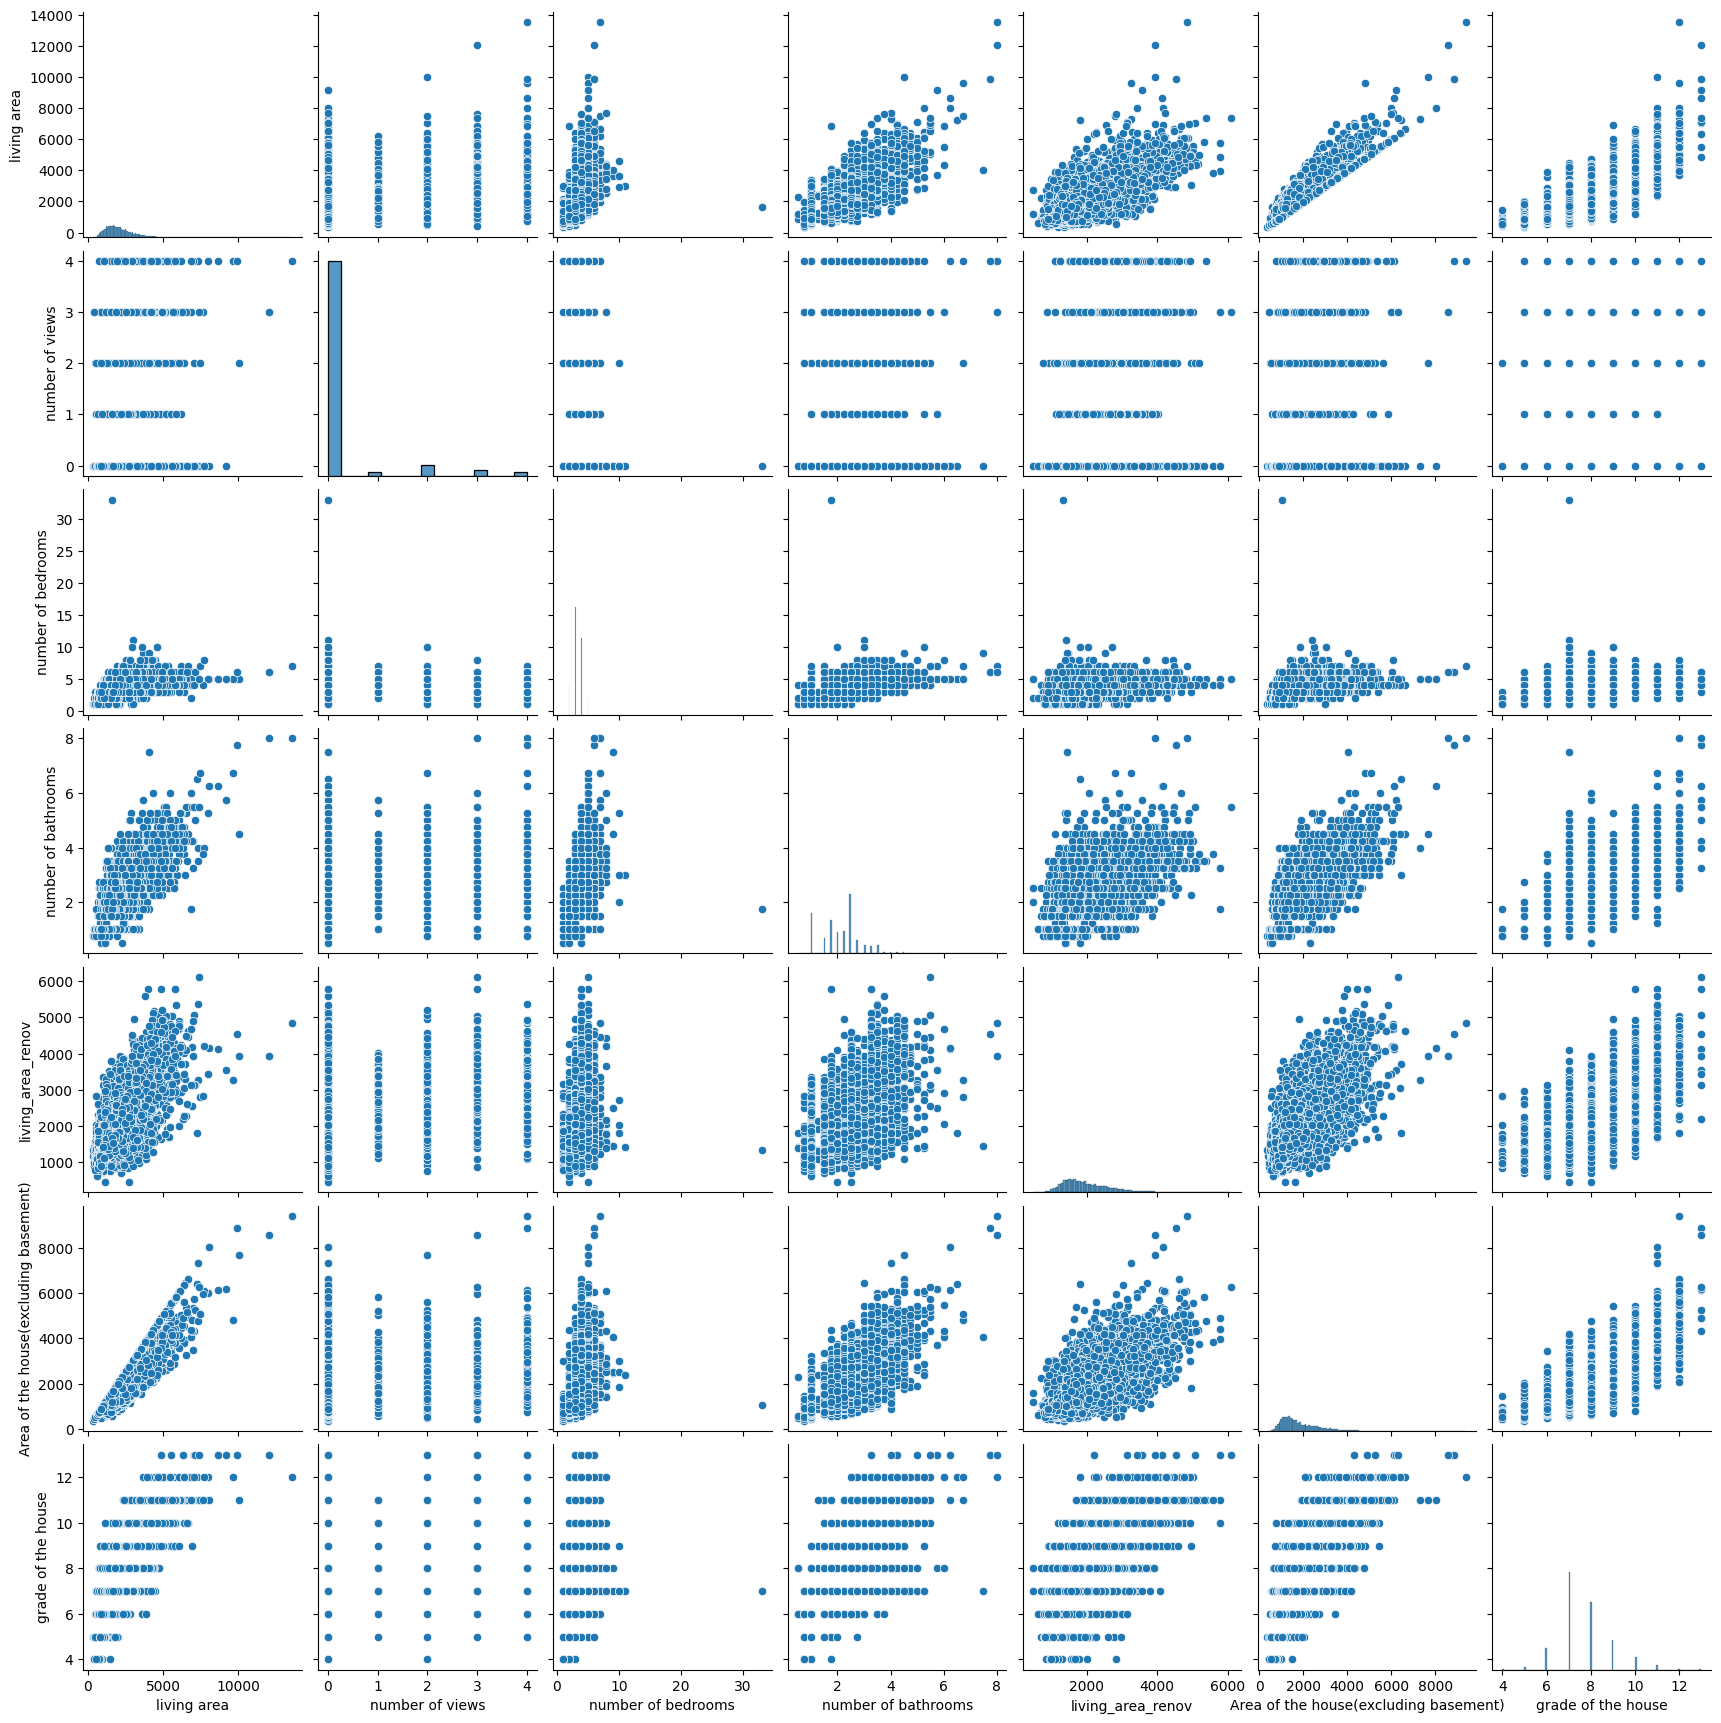

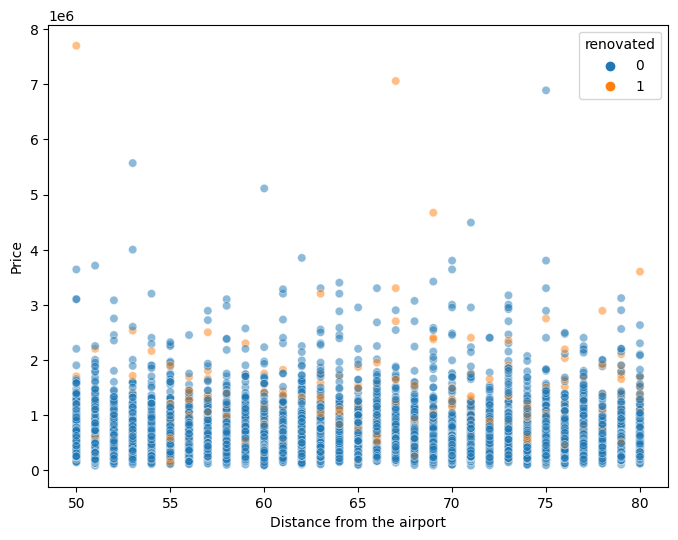

In [ ]:
# 1. House prices across postal codes:

plt.figure(figsize=(15, 8))
sns.boxplot(x="Postal Code", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

#2. Relationship between house size and other features:

# Scatterplot matrix
size_features = ["living area", "number of views", "number of bedrooms", "number of bathrooms", "living_area_renov", "Area of the house(excluding basement)", "grade of the house"]
sns.pairplot(df[size_features])
plt.show()

#3. Age and renovation year's effect on house prices:

# Create a new column for renovation status
df["renovated"] = df["Renovation Year"].apply(lambda x: 1 if x > 0 else 0)

# Scatterplot for age and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Distance from the airport", y="Price", hue="renovated", data=df, alpha=0.5)
plt.show()

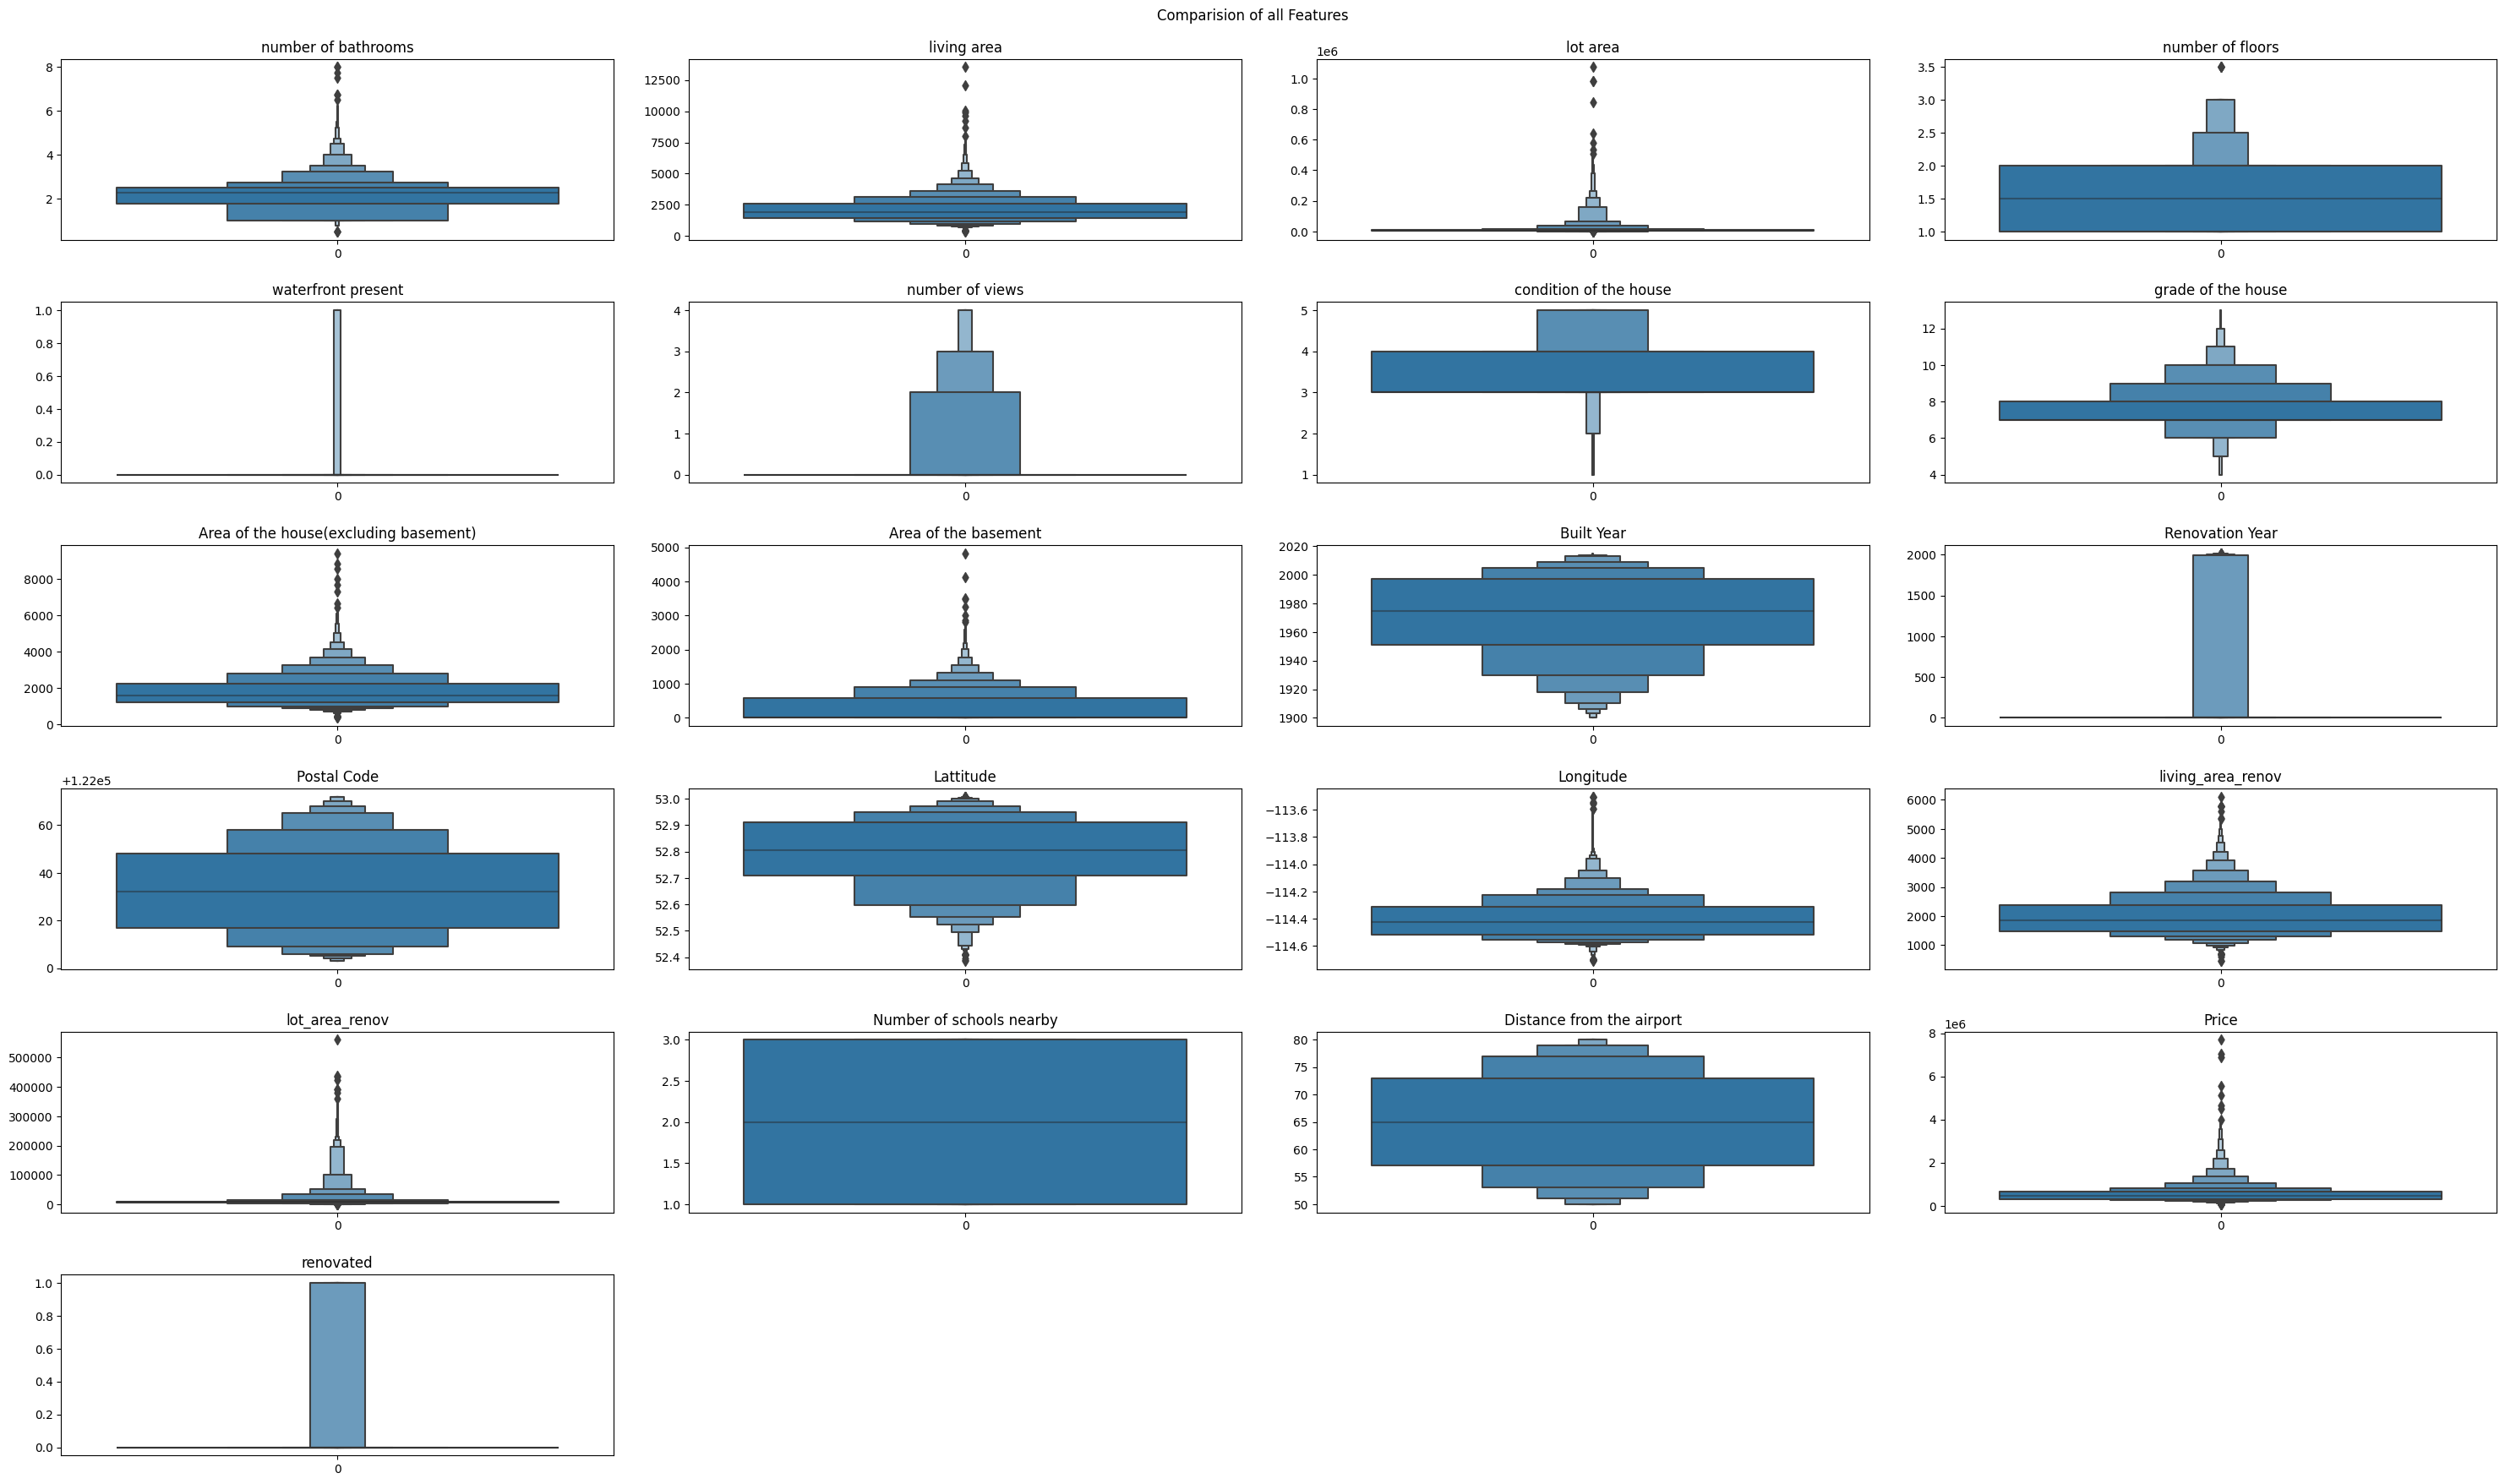

In [ ]:
fig = plt.figure(figsize = [30, 18])
for i in range(1, len(list(df.columns))):
    plt.subplot(6, 4, i)
    fig.tight_layout(pad=2)
    df_new = df.iloc[:,i]
    plt.suptitle('Comparision of all Features')
    plt.title(list(df.columns)[i])
    sns.boxenplot(df_new)
plt.show()

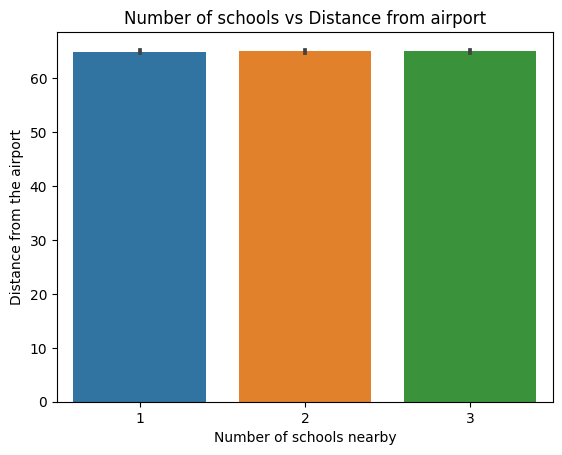

In [ ]:
sns.barplot(data=df, x='Number of schools nearby', y='Distance from the airport')
plt.title('Number of schools vs Distance from airport')
plt.show()

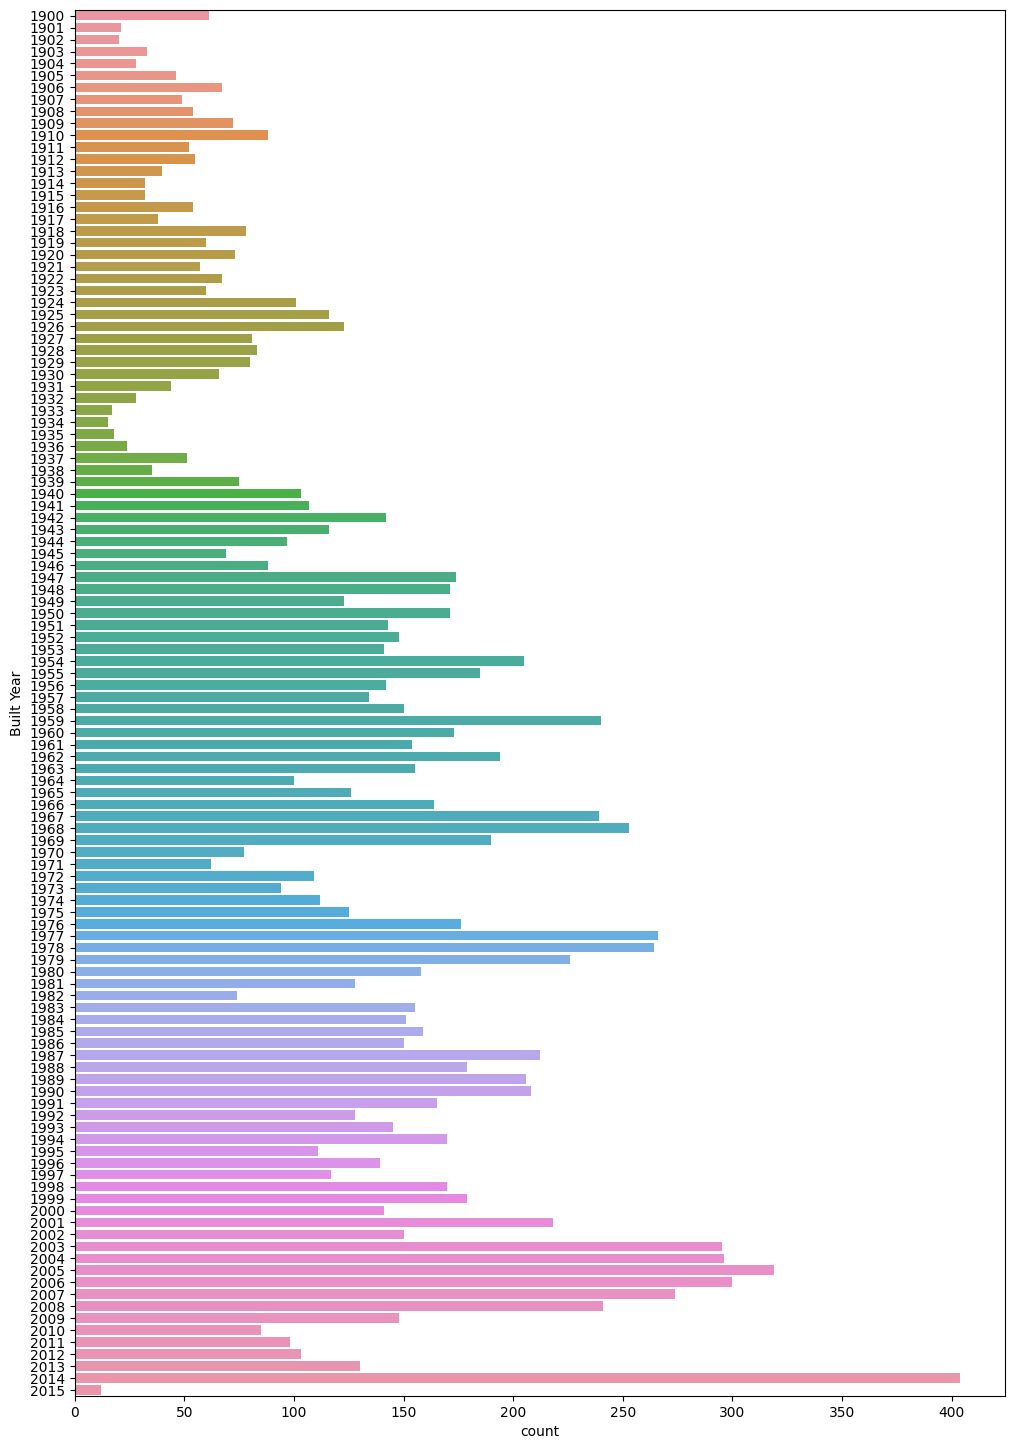

In [ ]:
plt.figure(figsize=(12,18))
sns.countplot(data=df,y='Built Year')
plt.show()

In [ ]:
import folium
m = folium.Map(location = [52.77, -114.4], tiles ='OpenStreetMap',
    zoom_start=8)

for index, location_info in df[(df['Built Year']==2014) & (df['Distance from the airport']<=70)].iterrows():
    folium.Marker([location_info["Lattitude"], location_info["Longitude"]], popup=location_info["Price"],icon=folium.Icon(color='red')).add_to(m)
m